# Normalization
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1.

### Types of normalization
There are actually various types of normalization techniques available in sklearn but we are majorly going to focus on the below techniques
- **Mean Normalization** \
mean normalization formula is 
![Mean Normalizatio Formula](./Images/4.png)
- **Max Absolute Scaling** \
It is simply the dataset value by absolute of maximum value in the datatset. It is used when your data is sparse.
- **Robust Scaling** \
It is used when your data contains more outliers. Actually it is robust to outliers.\
The formula for robust scaling is
![Robust Scaling Formula](./Images/5.png)
- **Min Max Scalar** \
It is one of the famous data scaling technique in the machine learning. when you want to use normalization in the machine learning 90% of time we use min-max scalar. So, min-max scalar is also known as normalization.\
Formula for min-max scalar is
![Min Max Scalar Formula](./Images/6.png)

## Min Max Scalar

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
dataset = pd.read_csv("Datasets/wine_data.csv", header = None, usecols=[0,1,2])
dataset.columns= ["Class Label", "Alcohol", "Malic Acid"]

In [9]:
dataset.head()

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

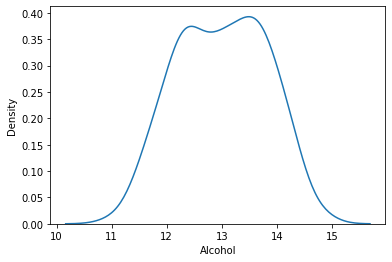

In [13]:
sns.kdeplot(x="Alcohol", data=dataset)

<AxesSubplot:xlabel='Malic Acid', ylabel='Density'>

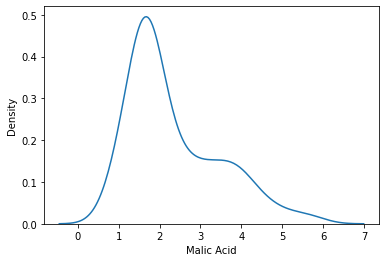

In [12]:
sns.kdeplot(x="Malic Acid", data=dataset)

<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

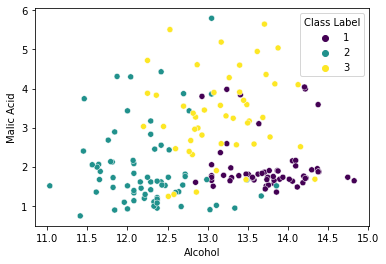

In [19]:
sns.scatterplot(x="Alcohol", y="Malic Acid", data=dataset, hue="Class Label", palette="viridis")

In [22]:
X = dataset.iloc[:,1:]
Y = dataset.iloc[:,0]

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [25]:
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [26]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Lets check the minimum and maximum value of the scaled data it should be 0 and 1.

In [29]:
# First check for dataset without applying minmax scalar
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [31]:
# Now check the dataset which has applied min max scalar
np.round(X_train_scaled.describe(),1)
# we can see over here the maximum value is 1 and minimum value is 0

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


### Effects of Min Max Scalar

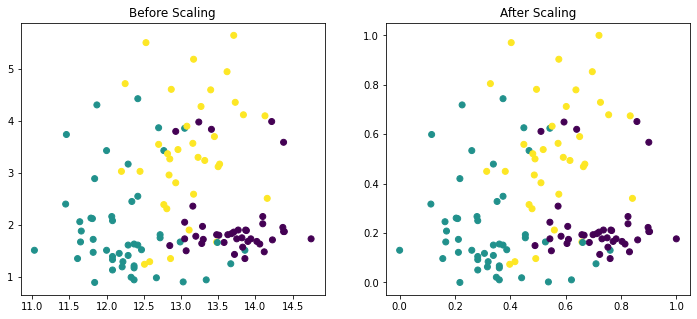

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'],c=Y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'],c=Y_train)
ax2.set_title("After Scaling")
plt.show()

as we can see over here in above graph the there is no change in the data. But scale is changed

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()